# Linear Regression Assignment
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends.

- To cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- To understand the factors affecting the demand for these shared bikes in the American market. i.e, 
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

In [114]:
# Importing required packages

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Importing dataset
day_df = pd.read_csv("day.csv")

In [3]:
# View dataset
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the day dataframe

In [4]:
day_df.shape

(730, 16)

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking for null values in the dataset
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Encoding the categorical variable Columns

In [8]:
day_df.season = day_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [9]:
day_df.mnth = day_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
day_df.weekday = day_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [11]:
day_df.weathersit = day_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping the unwanted columns
- instant has only index for the row, dteday has date which can be compensated by year and month column,
- casual and registered seems to be the breakup by category for cnt column.

In [13]:
day_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [14]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
day_df.shape

(730, 12)

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

In [17]:
categorical_columns = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
numerical_columns = ['temp','atemp','hum','windspeed','cnt']

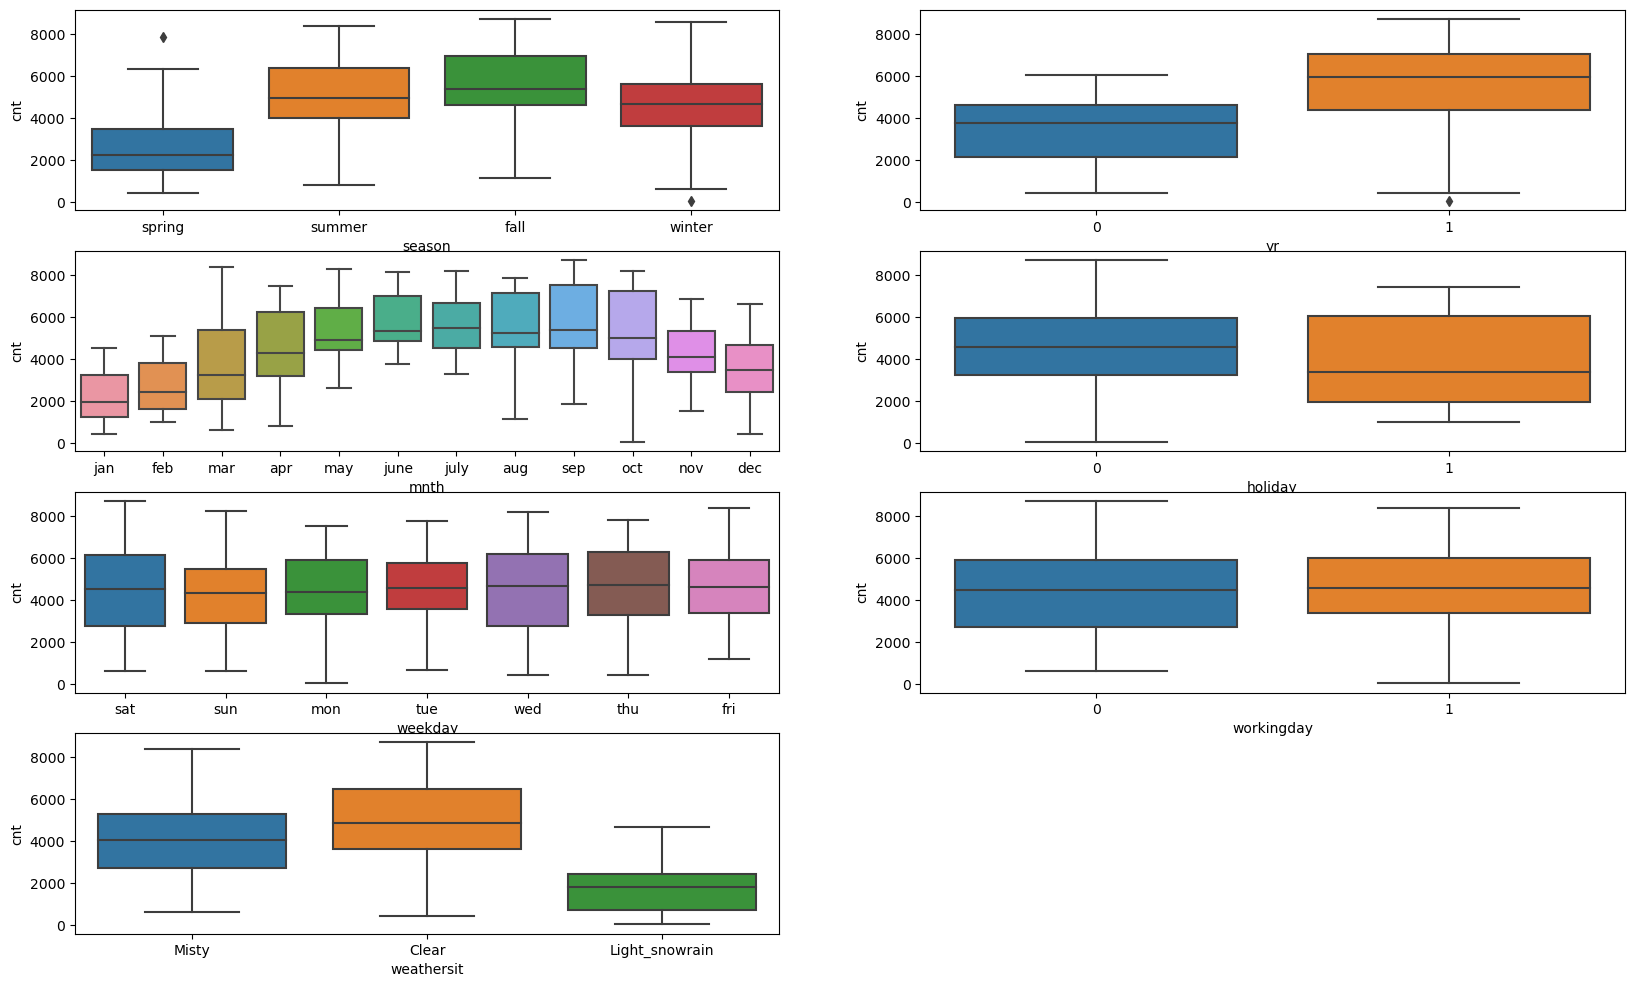

In [18]:
# Univariat Analysis
# Visualizing categorical variables 

fig = plt.figure(figsize=(20, 12))
num_rows = 4
num_cols = 2

position = 1
colors = plt.rcParams["axes.prop_cycle"]()

for col in categorical_columns:
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    c = next(colors)["color"]
    sns.boxplot(x = col , y = 'cnt', data = day_df)
    
plt.show()

In [19]:
# Segmented Univariat Analysis
# function to create barplot for categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.barplot(x= column, y= 'cnt',data= day_df)
    plt.subplot(1,2,2)
    sns.barplot(x= column,y= 'cnt',data= day_df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

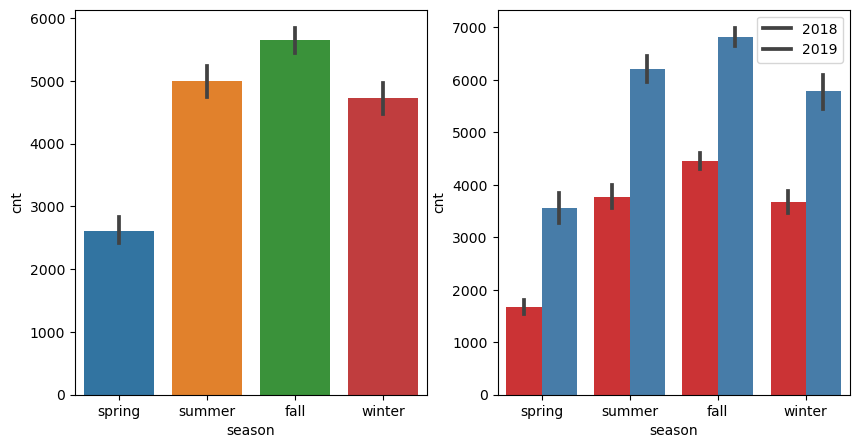

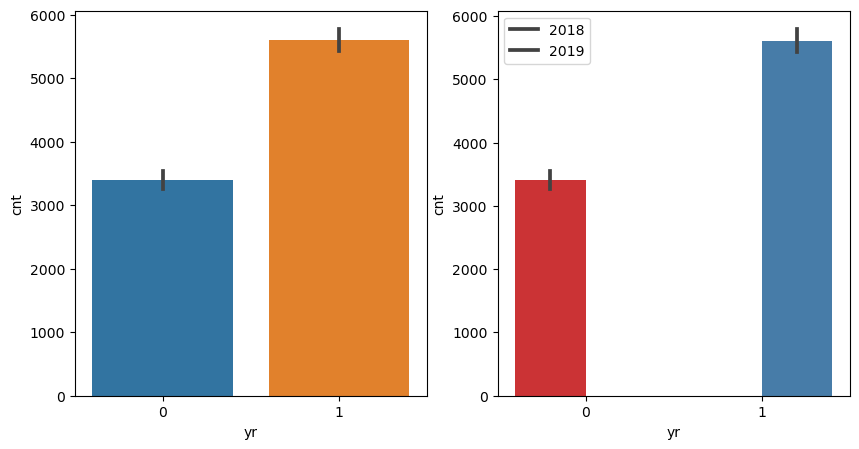

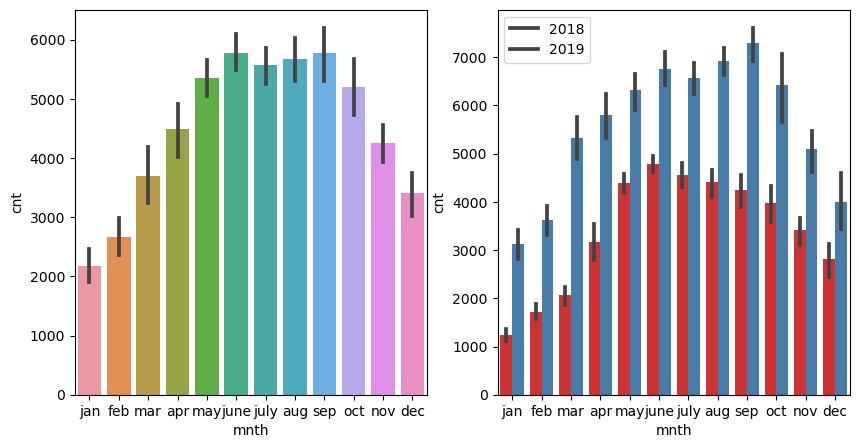

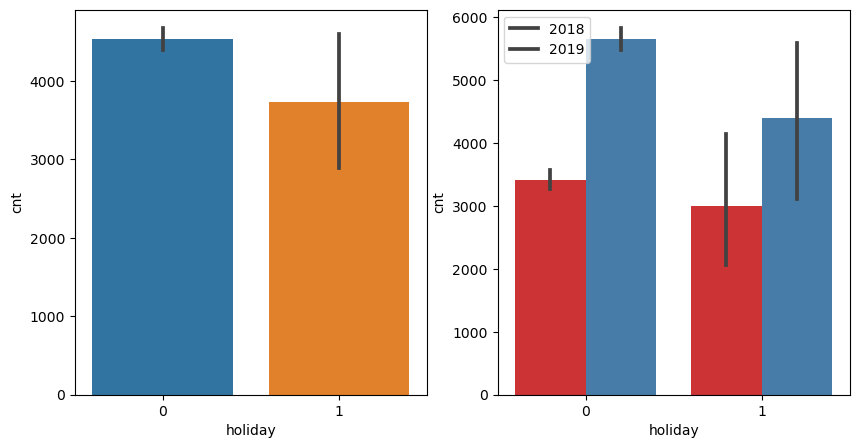

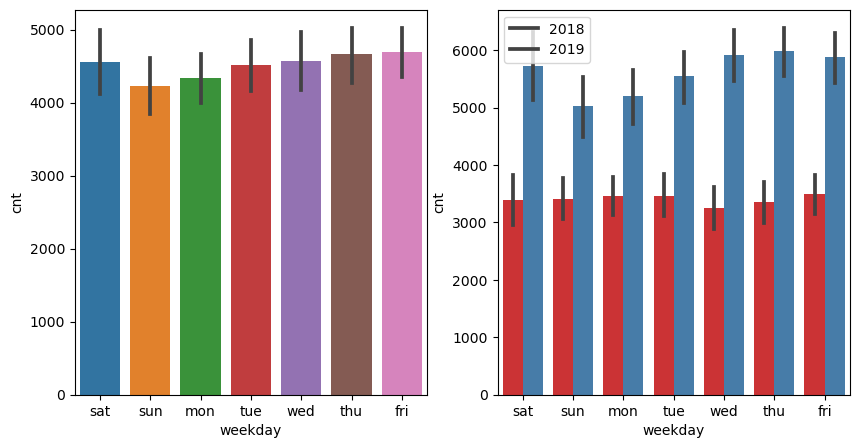

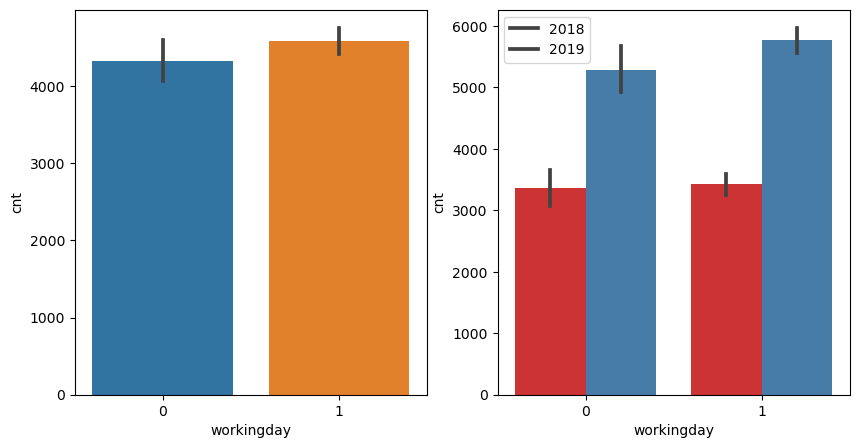

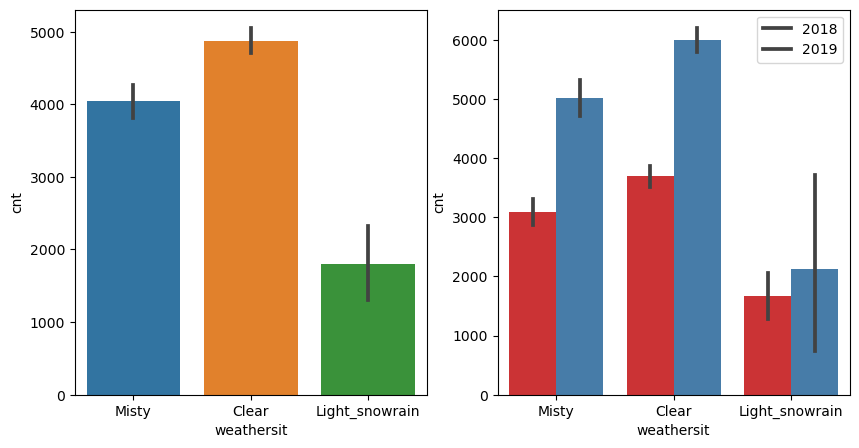

In [20]:
for col in categorical_columns:
    plot_cat_columns(col)   


## Observations
- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019
- 2019 attracted more number of booking compated to 2018, which shows good progress in terms of business.
- Most of the bookings has been done during the month of may, june, july, aug, sep and oct. The bookings treand increases in the start of the year and decreses towards the end of the year
- When its not holiday, booking seems to be less in number as it should be.
- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.
- Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

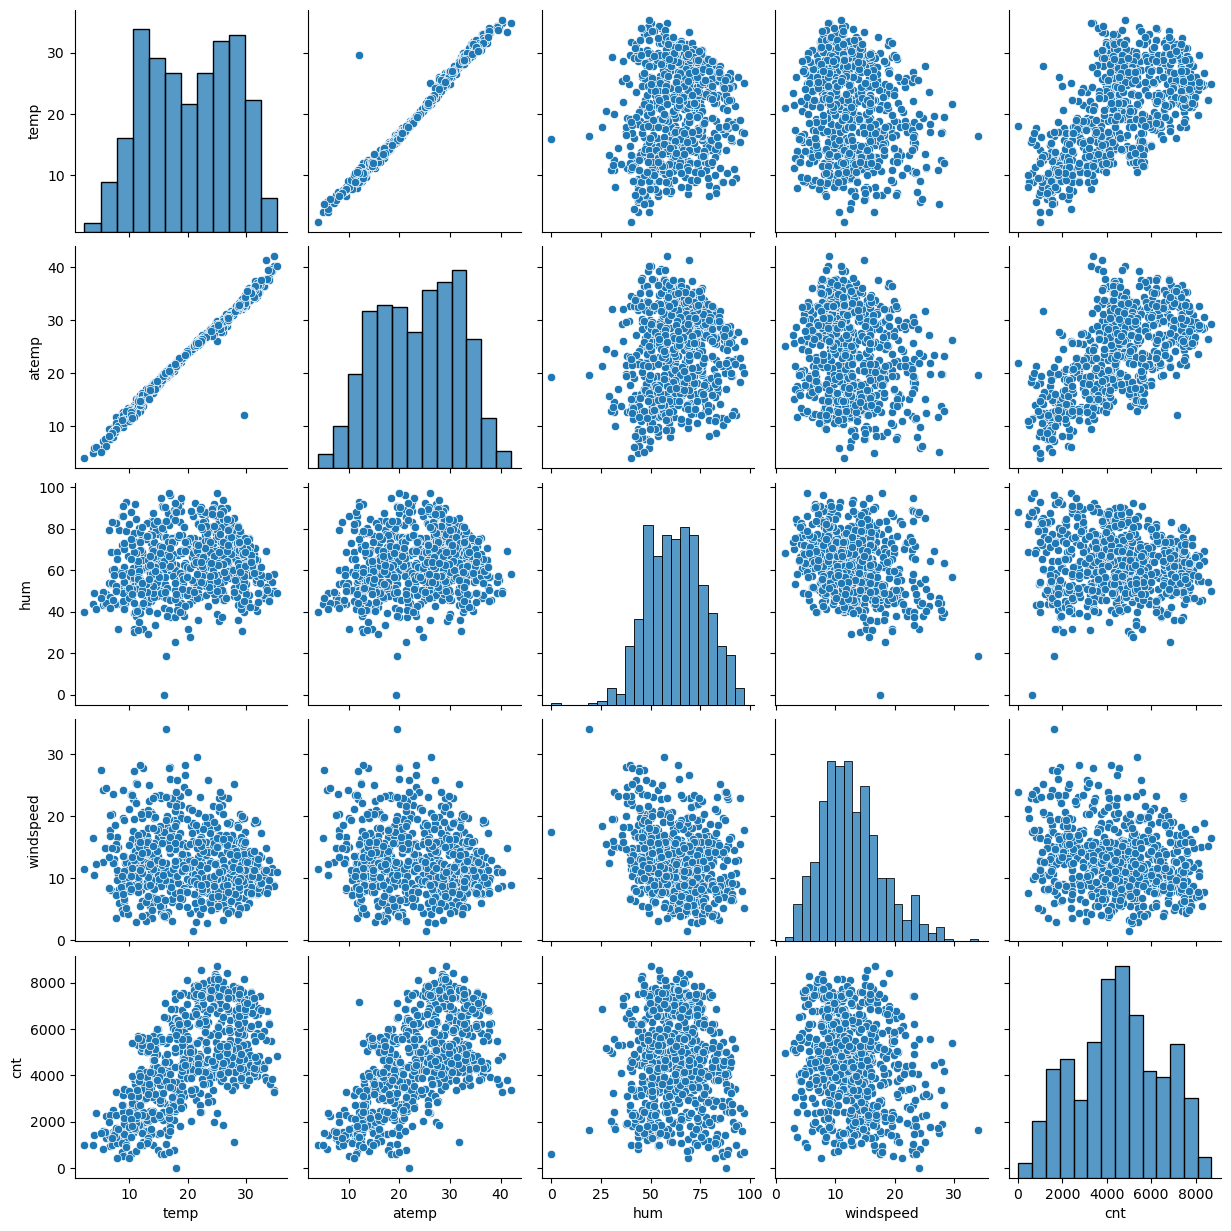

In [21]:
# Visualizing numerical columns
sns.pairplot(data=day_df,vars=numerical_columns)
plt.show()

## Step 3: Data Preparation


In [22]:
## Create Dummy variables for month, weekday, weathersit , season variables and store it in new variables

In [23]:
season_df = pd.get_dummies(day_df.season)

In [24]:
season_df.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [25]:
## drop first column and do the same for other column variables
season_df = pd.get_dummies(day_df.season, drop_first = True)
months_df=pd.get_dummies(day_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(day_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(day_df.weathersit,drop_first=True)

In [26]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Add the results to the original day dataframe

day_df = pd.concat([day_df, season_df, months_df, weekdays_df, weathersit_df], axis = 1)

In [28]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [29]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  aug             730 non-null    uint8  
 16  dec             730 non-null    uint8  
 17  feb             730 non-null    uin

In [30]:
# dropping unnecessary columns as we have already created dummy variable out of it.

day_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

In [33]:
day_df.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [34]:
np.random.seed(0)
day_df_train, day_df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
day_df_train.shape

(510, 30)

In [36]:
day_df_test.shape

(219, 30)

In [37]:
day_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# Using MinMaxScaler to Rescaling the features

In [39]:
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
day_df_train[numerical_columns] = scaler.fit_transform(day_df_train[numerical_columns])

In [41]:
day_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [42]:
day_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


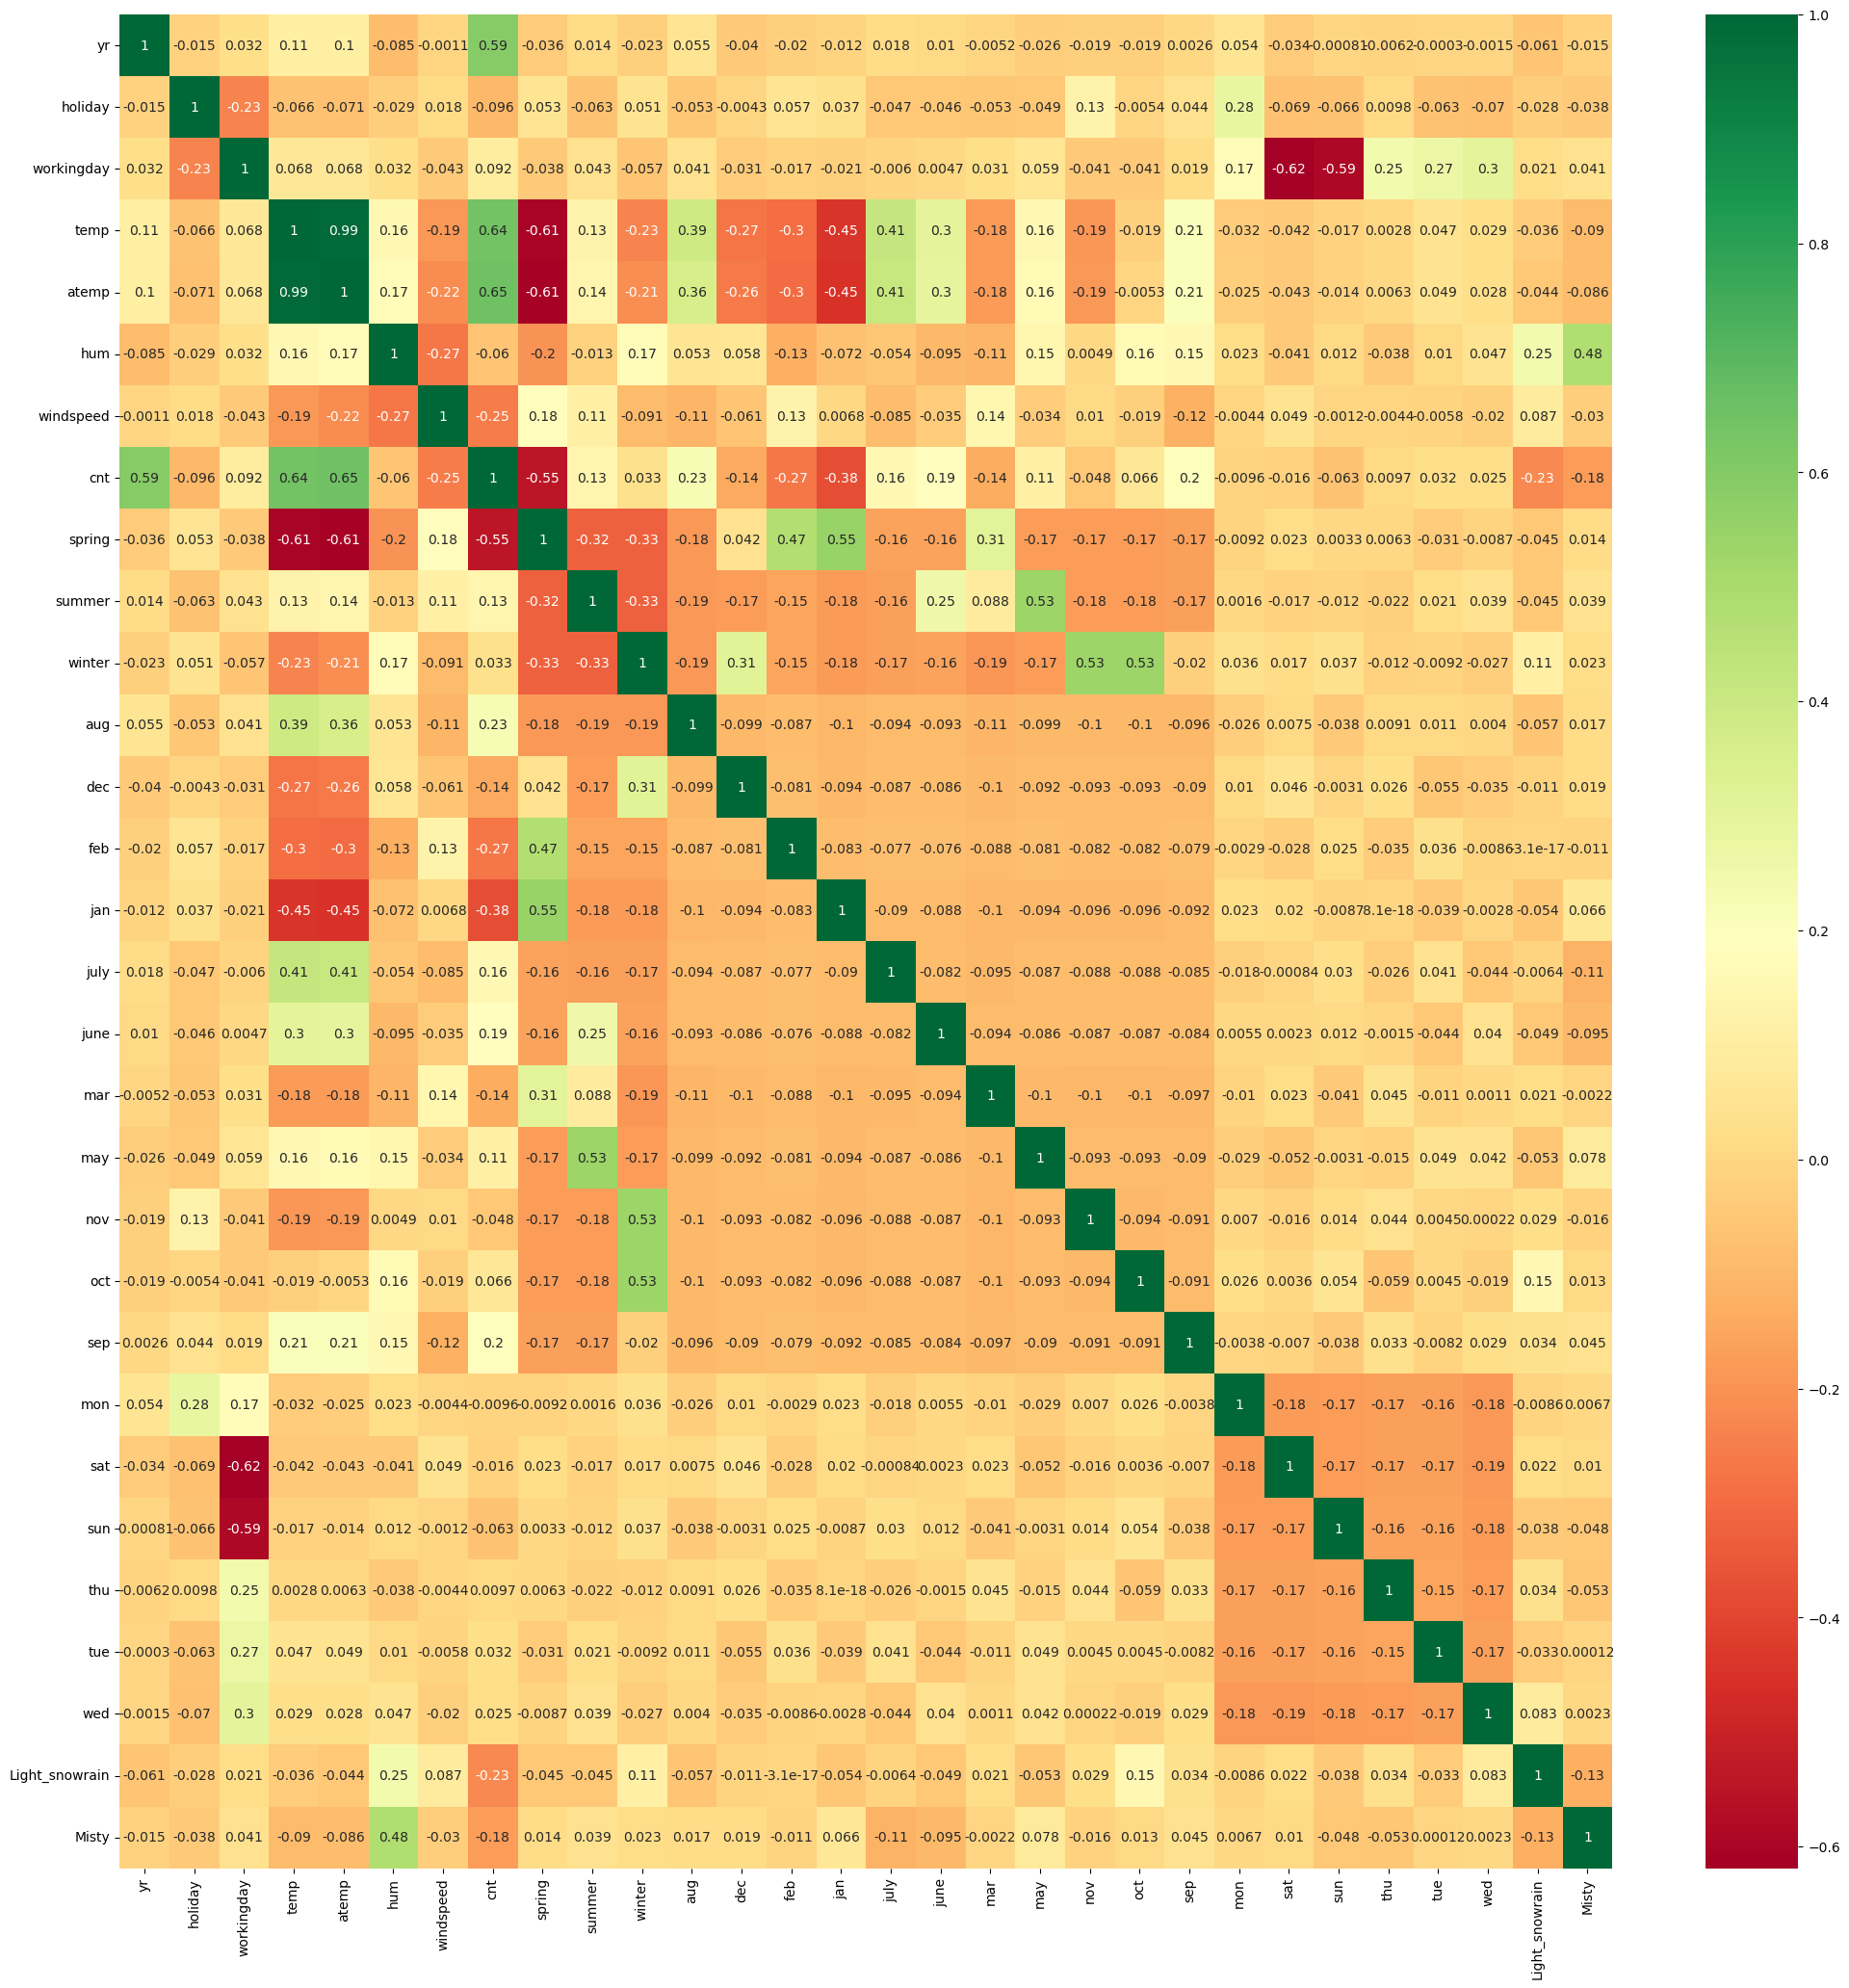

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(day_df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

- temp and atemp have strong correlation, so one of the variable can be dropped based on the VIF and p values
- yr, temp and atemp have strong correlation with cnt variable.
- Feb and Jan show correlation with Spring
- Misty shows correlation with humidity
- Nov, Oct show correlation with Winter
- May shows correlation with summer.

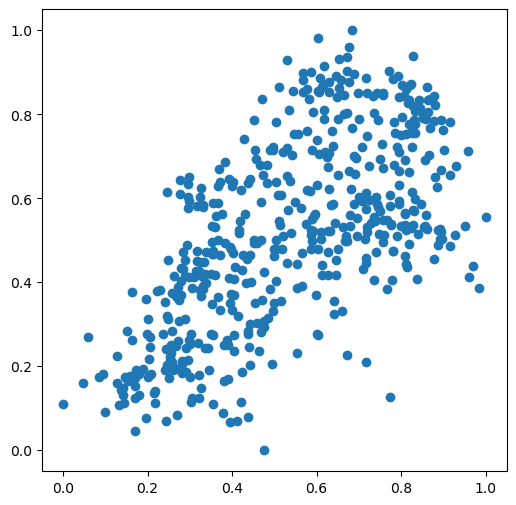

In [44]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(day_df_train.temp, day_df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [48]:
y_train = day_df_train.pop('cnt')
X_train = day_df_train

In [49]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [50]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Building our model with RFE (Recusive Feature Elimination)

In [51]:
# Running RFE with output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', False, 2),
 ('aug', True, 1),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', True, 1),
 ('oct', False, 2),
 ('sep', False, 2),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', False, 2)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'aug', 'july', 'nov', 'sat', 'sun', 'Light_snowrain'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'oct',
       'sep', 'mon', 'thu', 'tue', 'wed', 'Misty'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,aug,july,nov,sat,sun,Light_snowrain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,1,0,0


In [56]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,aug,july,nov,sat,sun,Light_snowrain
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0
728,1.0,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,1,0,0


In [58]:
# Running the LR model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          6.07e-178
Time:                        13:42:10   Log-Likelihood:                 482.43
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     496   BIC:                            -877.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3115      0.025     12.

In [60]:
# Calculate VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,holiday,inf
3,workingday,inf
12,sat,inf
13,sun,inf
4,temp,55.40
5,atemp,53.19
8,spring,1.94
10,july,1.41
9,aug,1.38
6,hum,1.24


In [66]:
# "workingday" has high P value. so drop the column
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [67]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          6.07e-178
Time:                        13:45:15   Log-Likelihood:                 482.43
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     496   BIC:                            -877.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4168      0.031     13.

In [70]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,55.40
4,atemp,53.19
0,const,53.04
7,spring,1.94
9,july,1.41
8,aug,1.38
5,hum,1.24
10,nov,1.24
6,windspeed,1.19
13,Light_snowrain,1.11


In [71]:
# atemp and temp are highly correlated and creates Multicolineary hence dropping "atemp" column.
X_train_lm = X_train_lm.drop(["atemp"], axis = 1)

In [72]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_lm)

In [73]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [74]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.45e-179
Time:                        13:45:49   Log-Likelihood:                 482.17
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     497   BIC:                            -883.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4186      0.031     13.

In [75]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.69
3,temp,2.73
6,spring,1.94
8,july,1.40
7,aug,1.32
4,hum,1.23
9,nov,1.23
5,windspeed,1.14
12,Light_snowrain,1.11
10,sat,1.05


In [76]:
# Dropping "nov" as it has high p-value and seems insignifacant.
X_train_lm = X_train_lm.drop(["nov"], axis = 1)

In [77]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X_train_lm)

In [78]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [79]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.84e-180
Time:                        13:46:12   Log-Likelihood:                 482.12
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     498   BIC:                            -889.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4212      0.029     14.

In [80]:
## No effect on R2 value

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.01
3,temp,2.42
6,spring,1.66
8,july,1.40
7,aug,1.32
4,hum,1.23
5,windspeed,1.14
11,Light_snowrain,1.11
9,sat,1.05
10,sun,1.04


In [82]:
# "sat" colum has higher p value and slightly higher VIF. So droppring "sat" column
X_train_lm = X_train_lm.drop(["sat"], axis = 1)

In [83]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X_train_lm)

In [84]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.02e-181
Time:                        13:46:52   Log-Likelihood:                 481.61
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     499   BIC:                            -894.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4245      0.029     14.

In [86]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [87]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,12.76
3,hum,11.11
4,windspeed,3.98
0,yr,2.03
5,spring,1.81
7,july,1.50
6,aug,1.44
8,sun,1.18
9,Light_snowrain,1.11
1,holiday,1.04


In [88]:
# Dropping "hum" column as it seems insignificant
X_train_lm = X_train_lm.drop(["hum"], axis = 1)

In [89]:
# Build 6th model
X_train_lm = sm.add_constant(X_train_lm)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.92e-170
Time:                        13:47:24   Log-Likelihood:                 453.57
No. Observations:                 510   AIC:                            -887.1
Df Residuals:                     500   BIC:                            -844.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2561      0.020     12.

In [90]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.84
3,temp,2.38
5,spring,1.65
7,july,1.37
6,aug,1.32
4,windspeed,1.06
1,yr,1.02
9,Light_snowrain,1.02
2,holiday,1.01
8,sun,1.01


In [103]:
X_train_new = X_train_lm.drop(['const'], axis=1)

In [102]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'aug', 'july',
       'sun', 'Light_snowrain'],
      dtype='object')

In [104]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'aug', 'july', 'sun',
       'Light_snowrain'],
      dtype='object')

### The 6th model can be considered as the p values are less and also the VIF values are less than 5

In [91]:
# Checking params and their coefficinets
lm.params

const             0.256094
yr                0.235737
holiday          -0.084530
temp              0.462604
windspeed        -0.156327
spring           -0.136794
aug              -0.052852
july             -0.088904
sun              -0.041579
Light_snowrain   -0.249699
dtype: float64

## Residual Analysis of the train data

In [92]:
X_train_lm.head()

,const,yr,holiday,temp,windspeed,spring,aug,july,sun,Light_snowrain
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0


In [93]:
y_train_cnt = lm.predict(X_train_lm)

### Normality of Errors

Text(0.5, 0, 'Errors')

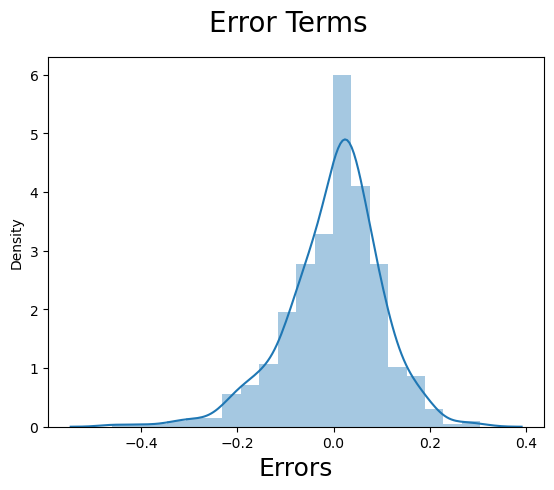

In [94]:
fig = plt.figure()
sns.distplot((y_train  - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

### MulitCollinearity

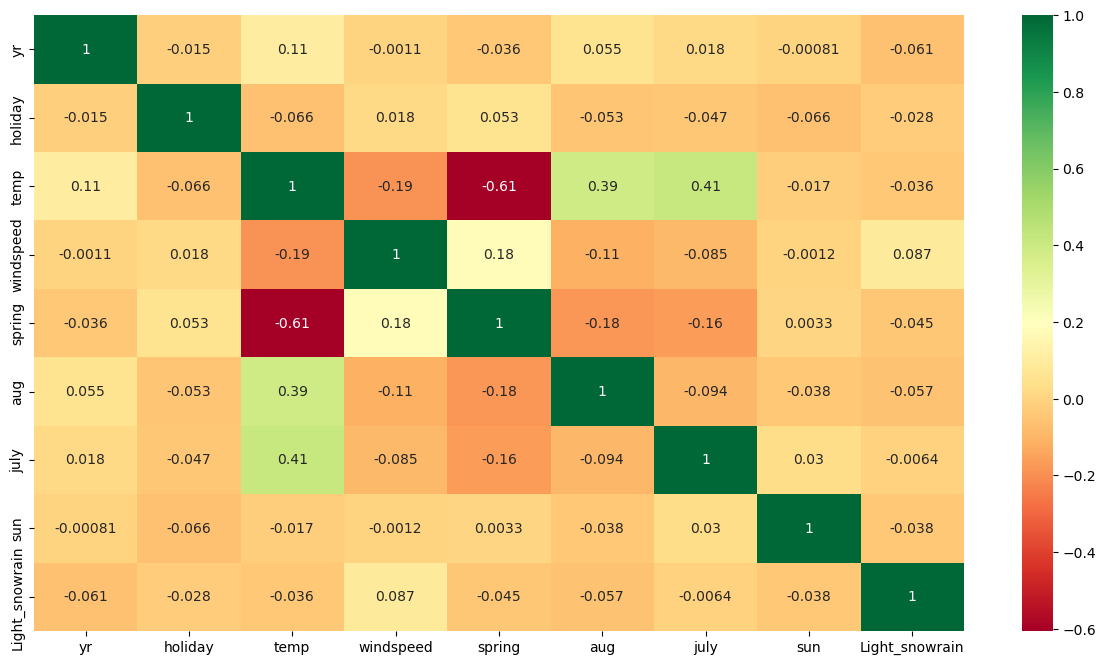

In [117]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

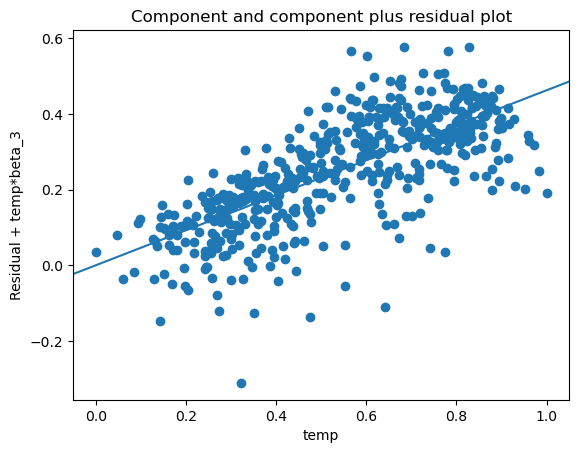

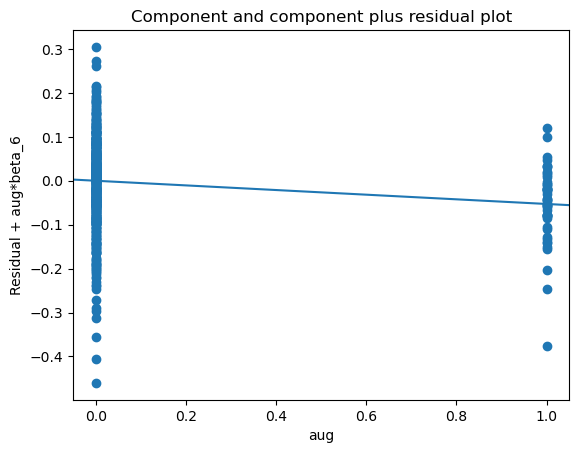

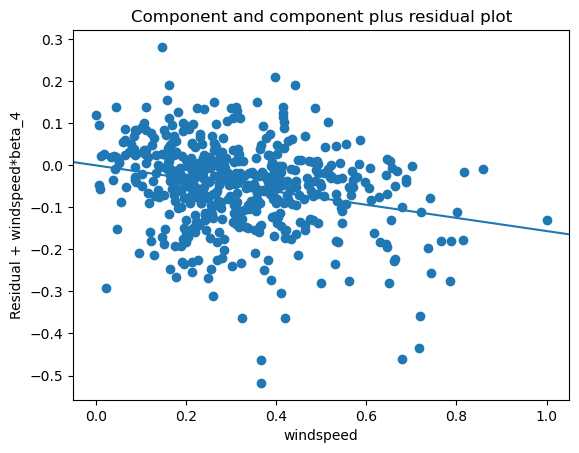

In [118]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm, 'aug')
plt.show()

sm.graphics.plot_ccpr(lm, 'windspeed')
plt.show()

### Homoscedasticity

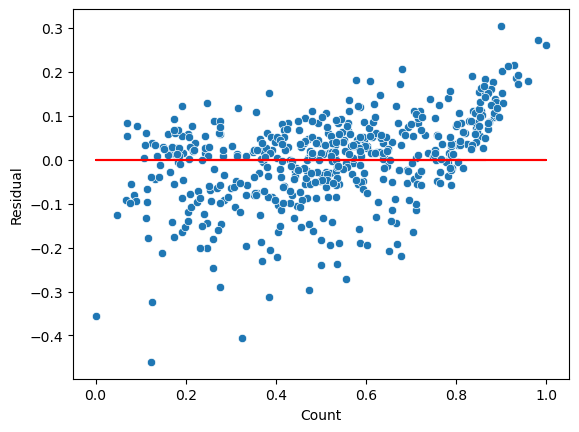

In [120]:
#y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_cnt
sns.scatterplot(x= y_train,y= residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### No visible pattern observed from above plot for residuals.

### Making Predictions

#### Applying the scaling on the test sets

In [95]:
day_df_test[numerical_columns] = scaler.transform(day_df_test[numerical_columns])

In [97]:
day_df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [98]:
y_test = day_df_test.pop("cnt")
X_test = day_df_test

In [99]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [100]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [106]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'aug', 'july',
       'sun', 'Light_snowrain'],
      dtype='object')

In [108]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

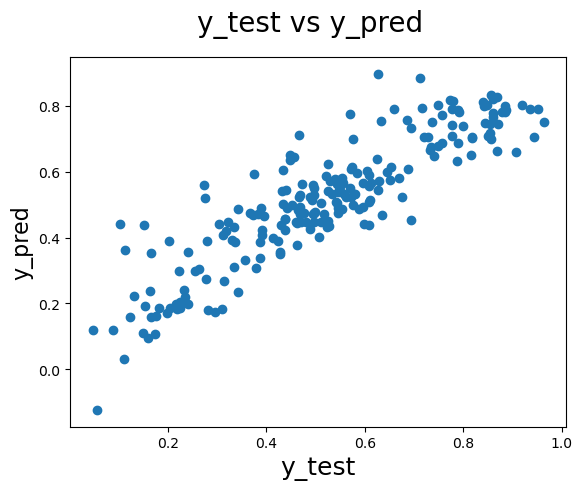

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [112]:
round(lm.params, 3)

const             0.256
yr                0.236
holiday          -0.085
temp              0.463
windspeed        -0.156
spring           -0.137
aug              -0.053
july             -0.089
sun              -0.042
Light_snowrain   -0.250
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.256 + 0.236  \times  yr - 0.085  \times  holiday + 0.436 \times temp - 0.156 \times windspeed - 0.137 \times spring - 0.053 \times aug - 0.089 \times july - 0.042 \times sun - 0.25 \times Light snowrain $

In [115]:
r2_score(y_test, y_pred)

0.7861840723372917

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.804
    - Test dataset R^2           : 0.7861
    
#### Demand of bikes depend on year, holiday, temp, windspeed, spring, aug, july, sun and Light_snowrain.